# Story - 5
#Historic data indicates that the occurrence and intensity of cyclonic storms (Hurricanes, Typhoons and Tornados) increases with the increased earth temperature. For this assignment you will need to tell this story to a non-technical audience (eg: a high-school earth science class).

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
from datetime import date, datetime

# Tropical cyclones and subtropical cyclones of the Atlantic basin (i.e., North Atlantic Ocean, Gulf of Mexico, and Caribbean Sea) data.

In [204]:
atlantic = pd.read_csv("https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/cyclonic%20storms%20-%20atlantic.csv")

In [205]:
atlantic.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


# Tropical cyclones and subtropical cyclones of the Northeast and North Central Pacific basin data.

In [206]:
pacific = pd.read_csv("https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/cyclonic%20storms%20-%20pacific.csv")

# Merge all cyclones data

In [207]:
df = pd.concat([pacific, atlantic], axis=0).reset_index()

In [208]:
df['Storm_date'] = pd.to_datetime(df['Date'] , format= '%Y%m%d')

In [209]:
# Show the count of missing values and fill them with mean.
for column in df.columns:
    missing_cnt = df[column][df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
      mean = round(df[column][df[column] != -999 ].mean())
      index = df.loc[df[column] == -999 , column].index
      df.loc[df[column] == -999 , column] = mean


Missing Values in column index =  0
Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  43473
Missing Values in column Low Wind NE =  62934
Missing Values in column Low Wind SE =  62934
Missing Values in column Low Wind SW =  62934
Missing Values in column Low Wind NW =  62934
Missing Values in column Moderate Wind NE =  62934
Missing Values in column Moderate Wind SE =  62934
Missing Values in column Moderate Wind SW =  62934
Missing Values in column Moderate Wind NW =  62934
Missing Values in column High Wind NE =  62934
Missing Values in column High Wind SE =  62934
Missing Values in column High Wind SW =  62934
Missing Values in column High Wind NW =  62934
Miss

In [210]:
# Restructure the dataframe for visibility and remove columns ID and Event.
df =  df[['ID', 'Name', 'Storm_date', 'Time', 'Event', 'Status', 'Latitude','Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE','Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW','High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]


In [211]:
# Change all time to format HHMM.
df['Time'] = df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t

<ipython-input-211-ca0ed99776de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].astype('object')


In [212]:
#convert status codes to numeric to quantify the intensity of cyclonic storms
def status_code(codes):
  if 'hu' in codes.strip().lower():
        return 5
  elif 'ts' in codes.strip().lower():
    return 4
  elif 'ss' in codes.strip().lower():
    return 3
  elif 'sd' in codes.strip().lower() or 'td' in codes.strip().lower():
    return 2

In [213]:
# Apply the function.
df['Time'] = df['Time'].apply(hhmm)
# Convert the status column to categorical.
df['Status'] = df['Status'].astype('category')
#create year column
df['Year'] = df.Storm_date.dt.year
df['Rate'] = df.apply(lambda x: status_code(x['Status']),axis=1)
df['Status'] = df.Status.str.strip()
#Drop the ID and Event columns
data = df.drop(columns = ['ID' , 'Event'])

# Calculate Total wind by each cyclonic storm

In [214]:
wind_col = ['Maximum Wind','Low Wind NE', 'Low Wind SE','Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE','Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW']
data['Total_wind']= data[wind_col].sum(axis=1)

In [215]:
data.head()

,Name,Storm_date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Rate,Total_wind
0,UNNAMED,1949-06-11,0000,TS,20.2N,106.3W,45,993,60,55,...,17,12,15,7,6,4,5,1949,4.0,329
1,UNNAMED,1949-06-11,0600,TS,20.2N,106.4W,45,993,60,55,...,17,12,15,7,6,4,5,1949,4.0,329
2,UNNAMED,1949-06-11,1200,TS,20.2N,106.7W,45,993,60,55,...,17,12,15,7,6,4,5,1949,4.0,329
3,UNNAMED,1949-06-11,1800,TS,20.3N,107.7W,45,993,60,55,...,17,12,15,7,6,4,5,1949,4.0,329
4,UNNAMED,1949-06-12,0000,TS,20.4N,108.6W,45,993,60,55,...,17,12,15,7,6,4,5,1949,4.0,329


In [216]:
col = ['Name', 'Storm_date', 'Year', 'Rate','Time', 'Status', 'Minimum Pressure','Total_wind']
data =data[col]

In [217]:
data.head()

,Name,Storm_date,Year,Rate,Time,Status,Minimum Pressure,Total_wind
0,UNNAMED,1949-06-11,1949,4.0,0000,TS,993,329
1,UNNAMED,1949-06-11,1949,4.0,0600,TS,993,329
2,UNNAMED,1949-06-11,1949,4.0,1200,TS,993,329
3,UNNAMED,1949-06-11,1949,4.0,1800,TS,993,329
4,UNNAMED,1949-06-12,1949,4.0,0000,TS,993,329


# Total occurrence of cyclonic storms per year

In [218]:
occur = data.groupby('Year').count()['Name'].reset_index()
occur.rename(columns = {'Name':'Occurrence'}, inplace = True)
occur

,Year,Occurrence
0,1851,98
1,1852,134
2,1853,100
3,1854,60
4,1855,35
...,...,...
160,2011,968
161,2012,1154
162,2013,914
163,2014,1140


In [219]:
data = pd.merge(data,occur, on='Year', how='left')
data

,Name,Storm_date,Year,Rate,Time,Status,Minimum Pressure,Total_wind,Occurrence
0,UNNAMED,1949-06-11,1949,4.0,0000,TS,993,329,476
1,UNNAMED,1949-06-11,1949,4.0,0600,TS,993,329,476
2,UNNAMED,1949-06-11,1949,4.0,1200,TS,993,329,476
3,UNNAMED,1949-06-11,1949,4.0,1800,TS,993,329,476
4,UNNAMED,1949-06-12,1949,4.0,0000,TS,993,329,476
...,...,...,...,...,...,...,...,...,...
75237,KATE,2015-11-12,2015,NaN,1200,EX,981,1095,1056
75238,KATE,2015-11-12,2015,NaN,1800,EX,983,1095,1056
75239,KATE,2015-11-13,2015,NaN,0000,EX,985,1830,1056
75240,KATE,2015-11-13,2015,NaN,0600,EX,985,1525,1056


# Temperature Data

In [220]:
temp = pd.read_csv('https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/USA%20-%20Temp.csv',skiprows=4)

In [221]:
#create date when temperature was captured
temp['Temp_date'] = pd.to_datetime(temp['Date'] , format= '%Y%m')

#create year when temperature was captured
temp['Year'] = temp['Temp_date'].dt.year
#Rename value to temperature
temp.rename(columns = {'Value':'Temperature'}, inplace = True)

#Drop the date column
temp = temp.drop(columns = ['Date'])

In [222]:
temp.head()

,Temperature,Anomaly,Temp_date,Year
0,26.60,-7.22,1895-02-01,1895
1,35.04,1.22,1896-02-01,1896
2,33.39,-0.43,1897-02-01,1897
3,35.37,1.55,1898-02-01,1898
4,25.50,-8.32,1899-02-01,1899


# Merge the temperature and storm datasets

In [223]:
df_merged = pd.merge(data,temp, on='Year', how='inner')

In [224]:
df_merged.head()

,Name,Storm_date,Year,Rate,Time,Status,Minimum Pressure,Total_wind,Occurrence,Temperature,Anomaly,Temp_date
0,UNNAMED,1949-06-11,1949,4.0,0000,TS,993,329,476,31.91,-1.91,1949-02-01
1,UNNAMED,1949-06-11,1949,4.0,0600,TS,993,329,476,31.91,-1.91,1949-02-01
2,UNNAMED,1949-06-11,1949,4.0,1200,TS,993,329,476,31.91,-1.91,1949-02-01
3,UNNAMED,1949-06-11,1949,4.0,1800,TS,993,329,476,31.91,-1.91,1949-02-01
4,UNNAMED,1949-06-12,1949,4.0,0000,TS,993,329,476,31.91,-1.91,1949-02-01


In [225]:
data = df_merged.groupby('Year').mean()[['Total_wind','Occurrence','Temperature']].reset_index()
data.rename(columns = {'Total_wind':'Intensity'}, inplace = True)
data = data[data.Year >= 1980]
data.head()

<ipython-input-225-09199a7e048f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df_merged.groupby('Year').mean()[['Total_wind','Occurrence','Temperature']].reset_index()


,Year,Intensity,Occurrence,Temperature
85,1980,334.964529,733.0,32.85
86,1981,328.219420,793.0,36.59
87,1982,330.749380,806.0,32.59
88,1983,334.802139,748.0,36.86
89,1984,331.259361,1095.0,37.38


In [226]:
#Export Dataset to google drive
# path = '/content/drive/MyDrive/DATA 608/Assignment 5/data01.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   data.to_csv(f,index=False)


# Compare Intensity, Occurrence, and Temperature.

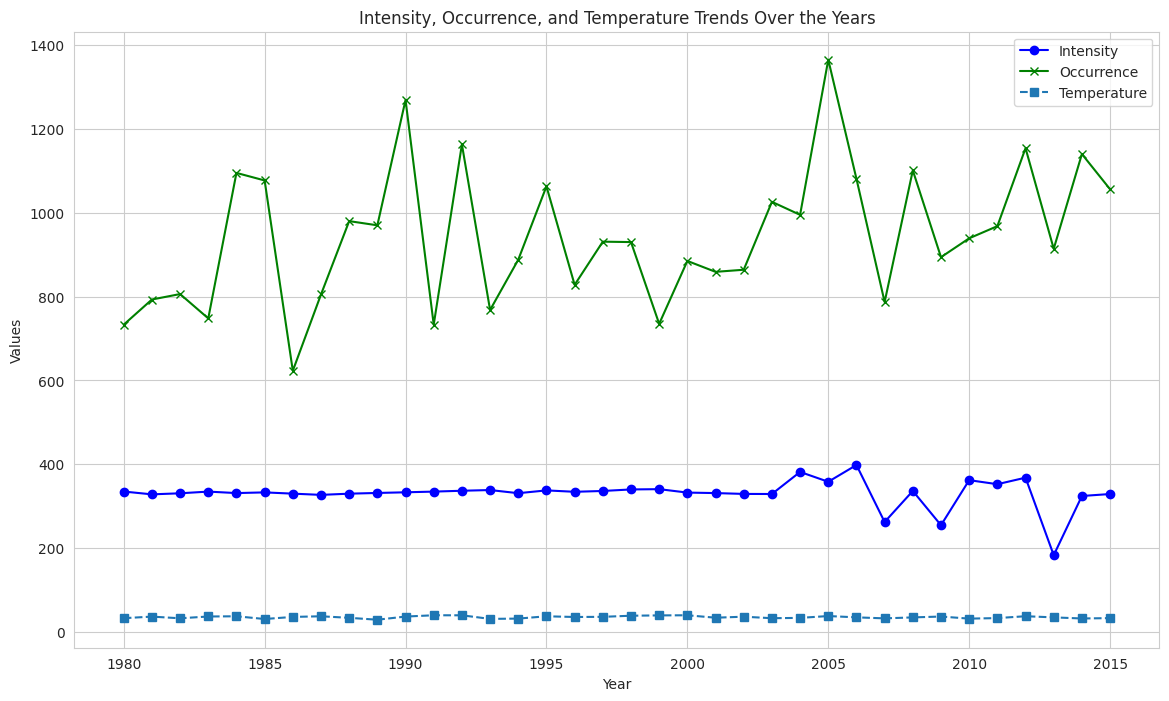

In [227]:
# Plotting Intensity, Occurrence, and Temperature over the years in a single graph for better comparison

plt.figure(figsize=(14, 8))

# Plotting each feature
plt.plot(data['Year'], data['Intensity'], label='Intensity', marker='o',color='blue')
plt.plot(data['Year'], data['Occurrence'], label='Occurrence', marker='x',color='green')
plt.plot(data['Year'], data['Temperature'], label='Temperature', linestyle="--", marker='s')

plt.title('Intensity, Occurrence, and Temperature Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Compare the relationship between Temperature vs Occurrence & Intensity.


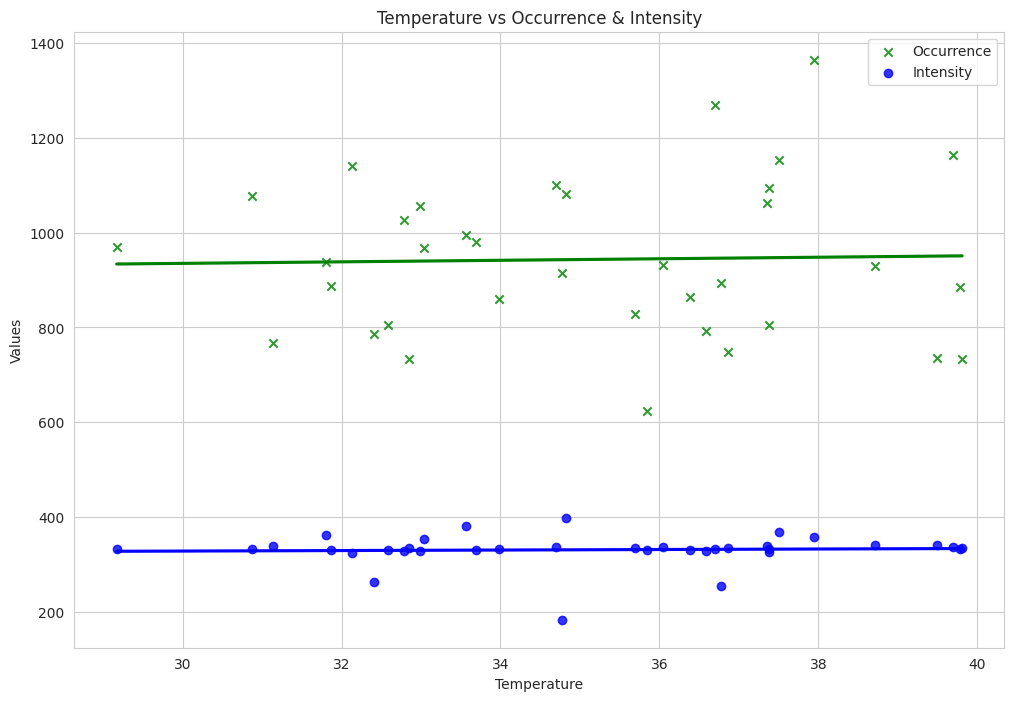

In [228]:
# Combining Temperature vs Occurrence and Temperature vs Intensity in one graph with trend lines

plt.figure(figsize=(12, 8))

# Temperature vs Occurrence
sns.regplot(x='Temperature', y='Occurrence', data=data, ci=None, marker='x', label='Occurrence', color='green')

# Temperature vs Intensity
sns.regplot(x='Temperature', y='Intensity', data=data, ci=None, marker='o', label='Intensity', color='blue')

plt.title('Temperature vs Occurrence & Intensity')
plt.xlabel('Temperature')
plt.ylabel('Values')
plt.legend()
plt.show()


# Compare the correlation between Temperature, Occurrence and Intensity.

<Axes: >

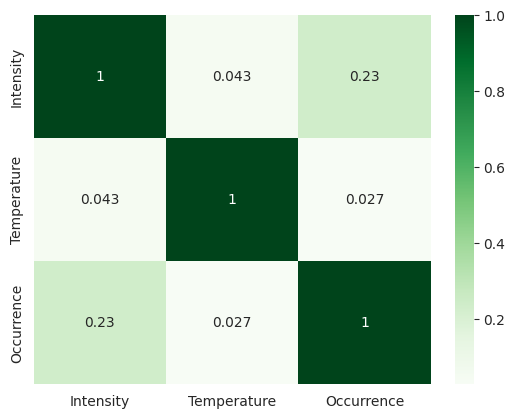

In [229]:
data = data[['Intensity','Temperature','Occurrence']]
matrix = data.corr()

#plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)